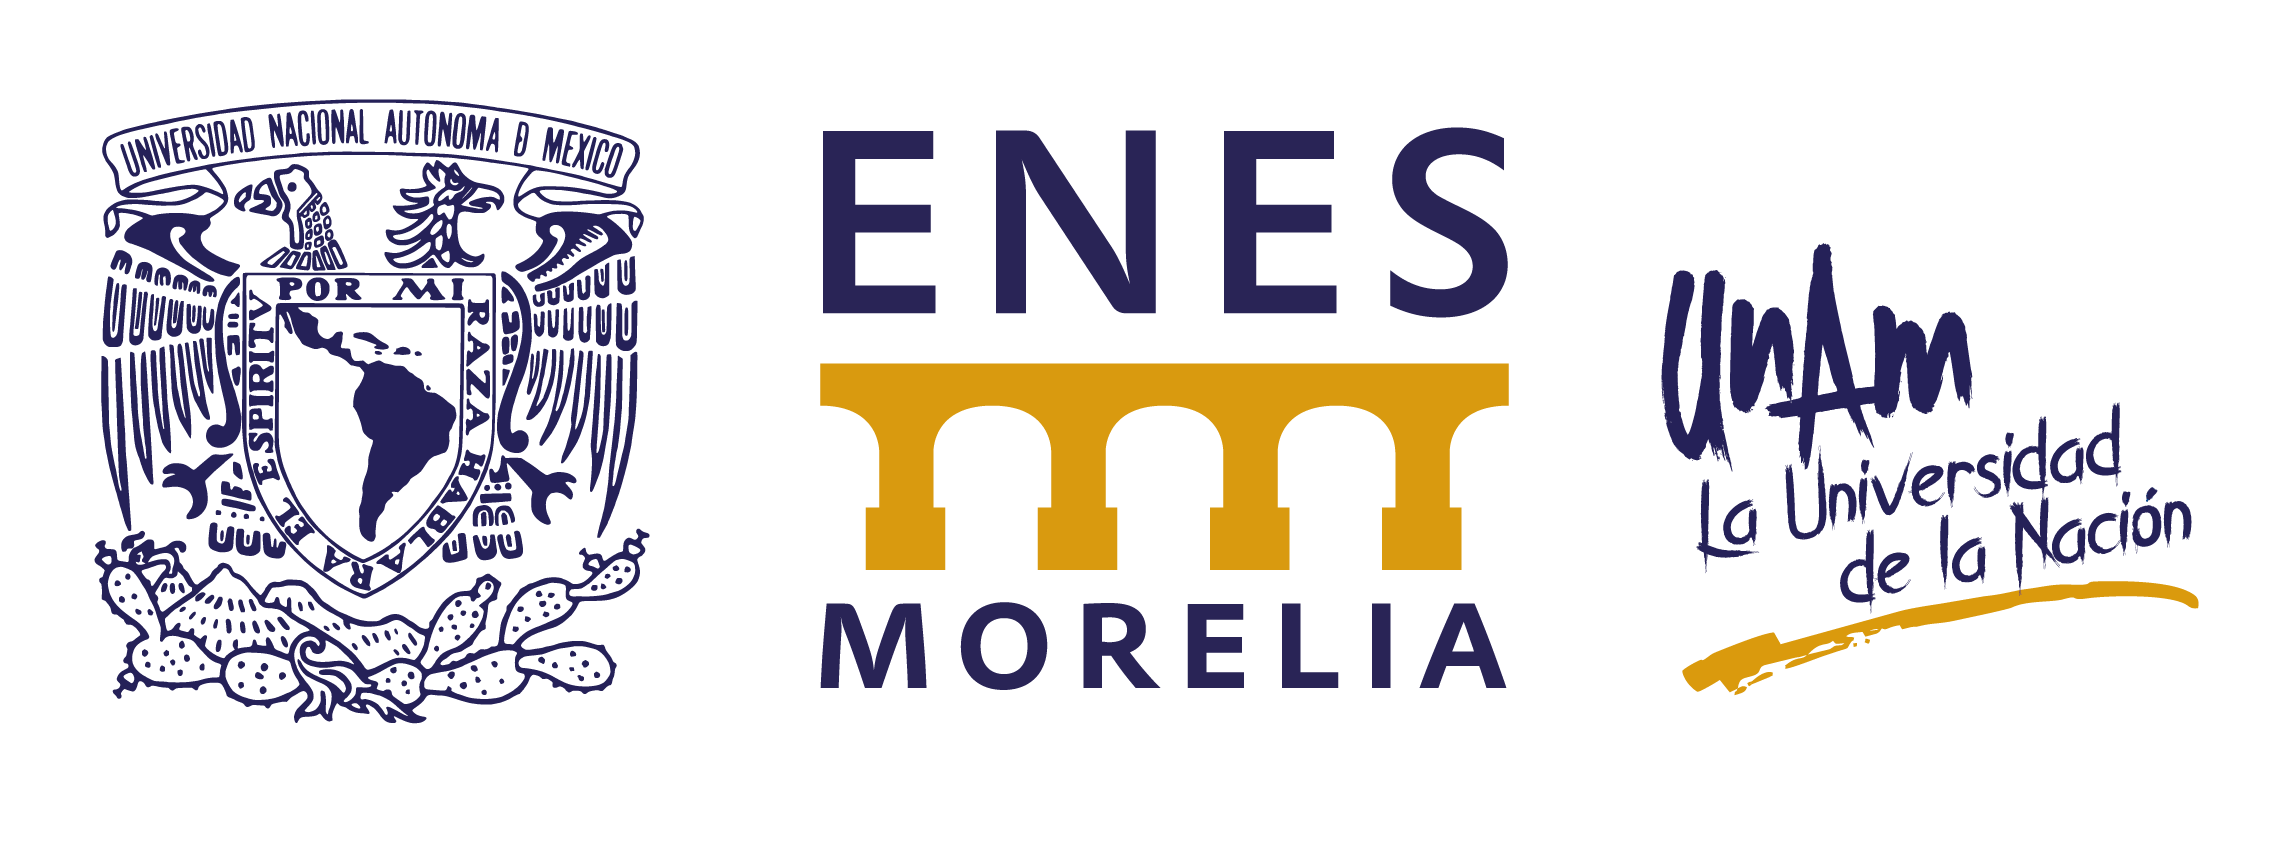

## Tecnologías para la información en Ciencias
## Estadística Descriptiva e Inferencial
## Descripción de los datos
### Ana Paola Carreón Hernández | Arely Hilda Luis Tiburcio
### 28 de Mayo del 2024

In [ ]:
# Leer la librerías necesarías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar el conjunto de datos

df = pd.read_csv("songs_normalize.csv")

In [ ]:
# Reenombrar la variable 'duration_ms' a 'duration_min'

df = df.rename(columns={'duration_ms': 'duration_min'})

In [ ]:
# Transformar la variable duration_ms de milisegundos a minutos

df["duration_min"] = df["duration_min"].apply(lambda x : (x/1000))

In [ ]:
# Función para convertir de segundos a minutos.

def convert(seconds):
    seconds = seconds % (24 * 3600)
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    seconds = seconds/100
    return round(minutes +  seconds, 2)

In [ ]:
# Aplicar la función al dataframe

df["duration_min"] = df["duration_min"].apply(convert)

In [ ]:
df.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.31,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,2.47,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,4.11,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,3.44,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,3.21,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# Aplicar una regla de 3 a la columna popularity
df["popularity"] = df["popularity"].apply(lambda x : ((x * 100) // 89))

In [ ]:
df.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.31,False,2000,86,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,2.47,False,1999,88,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,4.11,False,1999,74,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,3.44,False,2000,87,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,3.21,False,2000,73,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# Eliminar los valores que sean iguales a 'set()' en la columnas 'genre'
(df['genre'] == "set()").value_counts()

genre
False    1978
True       22
Name: count, dtype: int64

In [ ]:
condicion = df['genre'] == "set()"

In [ ]:
df = df[~condicion]

In [ ]:
# Tamaño del dataset

df.shape

(1978, 18)

In [ ]:
# Separar los elementos de cada elemento de la columna 'genre'

from ast import literal_eval

df['genre'] = df['genre'].apply(lambda x: x.split(","))

df

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.31,False,2000,86,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,[pop]
1,blink-182,All The Small Things,2.47,False,1999,88,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"[rock, pop]"
2,Faith Hill,Breathe,4.11,False,1999,74,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"[pop, country]"
3,Bon Jovi,It's My Life,3.44,False,2000,87,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"[rock, metal]"
4,*NSYNC,Bye Bye Bye,3.21,False,2000,73,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,[pop]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,3.01,False,2019,88,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,[pop]
1996,Taylor Swift,Cruel Summer,2.58,False,2019,87,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,[pop]
1997,Blanco Brown,The Git Up,3.21,False,2019,77,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"[hip hop, country]"
1998,Sam Smith,Dancing With A Stranger (with Normani),2.51,False,2019,84,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,[pop]


In [ ]:
# Crear un valor por cada uno de los elementos de la lista

df = df.explode('genre')

In [ ]:
df.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.31,False,2000,86,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,2.47,False,1999,88,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,rock
1,blink-182,All The Small Things,2.47,False,1999,88,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,pop
2,Faith Hill,Breathe,4.11,False,1999,74,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,pop
2,Faith Hill,Breathe,4.11,False,1999,74,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,country


In [ ]:
df.shape

(3682, 18)

In [ ]:
# Eliminar las columnas no necesarías

df.drop(['artist', 'song' ,'instrumentalness', 'key', 'acousticness', 'explicit'], axis=1, inplace=True)

In [ ]:
df.head()

,duration_min,year,popularity,danceability,energy,loudness,mode,speechiness,liveness,valence,tempo,genre
0,3.31,2000,86,0.751,0.834,-5.444,0,0.0437,0.355,0.894,95.053,pop
1,2.47,1999,88,0.434,0.897,-4.918,1,0.0488,0.612,0.684,148.726,rock
1,2.47,1999,88,0.434,0.897,-4.918,1,0.0488,0.612,0.684,148.726,pop
2,4.11,1999,74,0.529,0.496,-9.007,1,0.0290,0.251,0.278,136.859,pop
2,4.11,1999,74,0.529,0.496,-9.007,1,0.0290,0.251,0.278,136.859,country


In [ ]:
# Función que estratifica el tiempo en 4 periodos:
    # Periodo 1: 1998 - 2004
    # Periodo 2: 2005 - 2010
    # Periodo 3: 2011 - 2015
    # Periodo 4: 2016 - 2020


def periodos(x):
    if x >= 1998 and x <= 2004:
        return '1-98/04'
    elif x >= 2005 and x <= 2010:
        return '2-05/10'
    elif x >= 2011 and x <= 2015:
        return '3-11/15'
    elif x >= 2016 and x <= 2020:
        return '4-16/20'

In [ ]:
# Crear una columna llamada 'period' y aplicarle la función periodos

df['period'] = df['year'].apply(periodos)

In [ ]:
df.shape

(3682, 13)

In [ ]:
# Al ser solo ser dos datos contenidos en el género Jazz, se optó por eliminarlos, ya que no resultan significativos.

df = df[df['genre'] != 'Jazz']


In [ ]:
df = df[df['genre'] != 'Classical']

## Diagramas de Caja y Bigotes

In [ ]:
import seaborn as sn

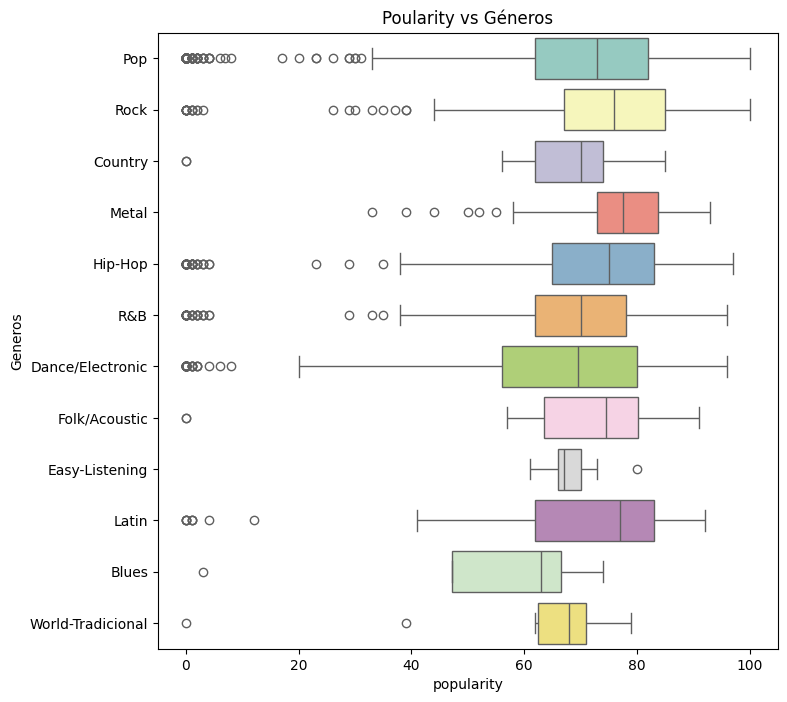

In [ ]:
# Diagrama de caja y bigotes comparando la popularidad vs los géneros

fig, ax = plt.subplots(figsize = (8, 8))
sn.boxplot(x='popularity', y='Generos',hue='Generos', data=df, palette="Set3").set(title='Poularity vs Géneros')
plt.show()

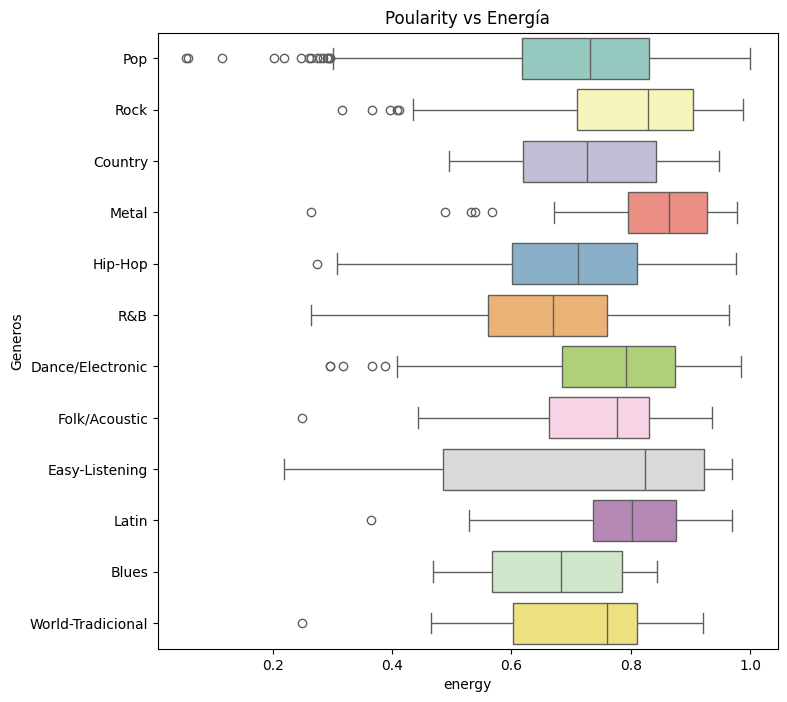

In [ ]:
# Diagrama de caja y bigotes comparando la popularidad vs la energía

fig, ax = plt.subplots(figsize = (8, 8))
sn.boxplot(x='energy', y='Generos',hue='Generos', data=df, palette="Set3").set(title='Poularity vs Energía')
plt.show()